In [1]:
import sys 
import os 

import mplfinance as mpf

from src.visualization.visualize import AlphaVantagePlots as AVP
from src.data.get_data import CSVsLoader as CSVs
from src.common.globals import StockRelated, G

GROWTH_STOCKS = G.growth_stocks
VALUE_STOCKS = G.value_stocks

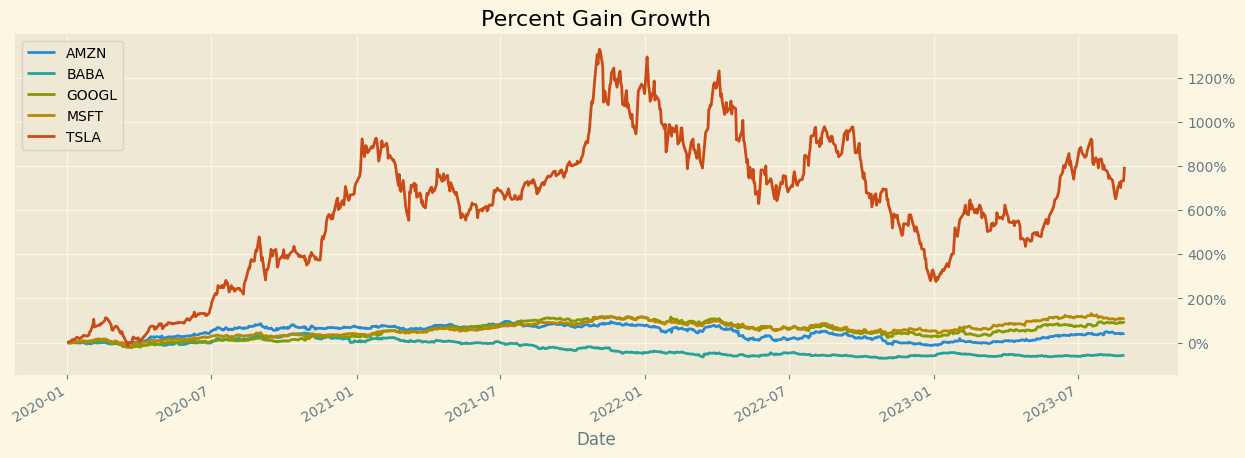

In [2]:
AVP.plot_prct_gain(GROWTH_STOCKS, '2020-01-01',  title='Percent Gain Growth') 

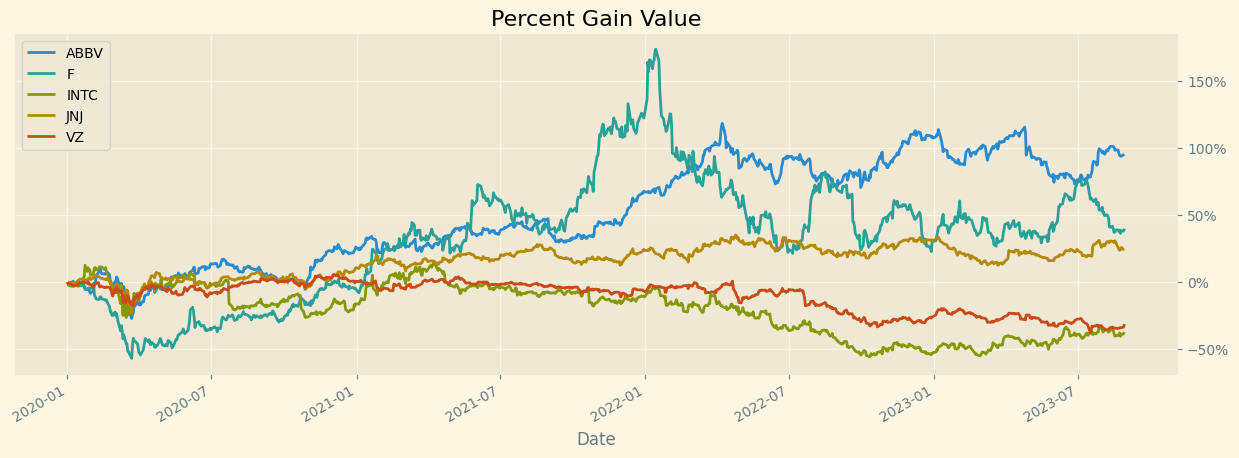

In [3]:
AVP.plot_prct_gain(VALUE_STOCKS, '2020-01-01', title='Percent Gain Value')

* Calculating colinearity between the stocks  
Make a comparison table for all 5 stocks I have entered above. This will give us correlation between stock price change after certain percentage change in a previous day. In other words we can compare how stocks react to previous day's price change in comparison to other stocks.

previous_day_return_bucket,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0
ABBV,0.007007,0.004004,0.006006,0.026026,0.090090,0.497497,0.139139,0.031031,0.014014,0.006006,0.003003
F,0.028028,0.010010,0.029029,0.059059,0.094094,0.241241,0.084084,0.060060,0.033033,0.016016,0.028028
INTC,0.017017,0.011011,0.028028,0.055055,0.085085,0.328328,0.107107,0.046046,0.023023,0.012012,0.009009
JNJ,0.003003,0.002002,0.007007,0.022022,0.080080,0.626627,0.101101,0.019019,0.003003,0.003003,0.002002
VZ,0.004004,0.002002,0.003003,0.030030,0.086086,0.603604,0.081081,0.020020,0.004004,0.003003,0.004004


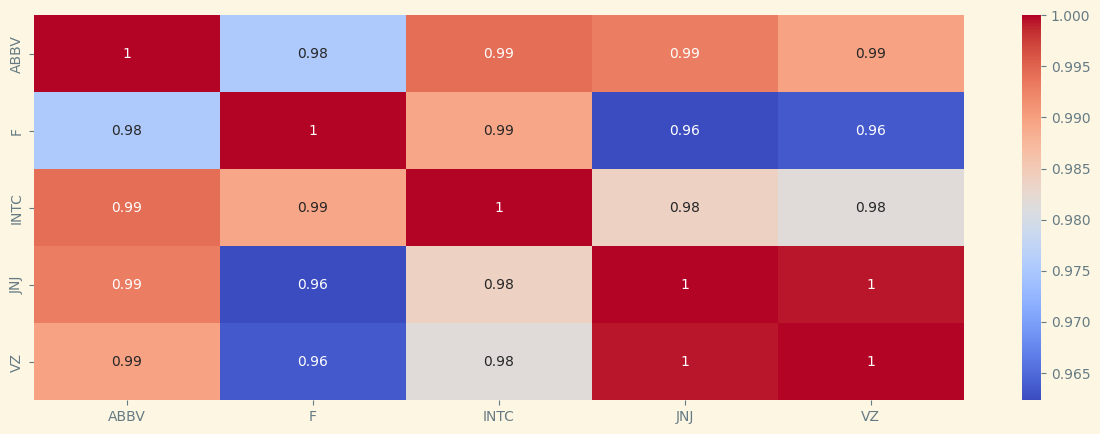

In [4]:
StockRelated.correlation_of_stock_price_reaction_to_price_change(VALUE_STOCKS, days_to_look_back=1000)

previous_day_return_bucket,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0
AMZN,0.015015,0.008008,0.027027,0.052052,0.092092,0.325325,0.097097,0.051051,0.028028,0.015015,0.013013
BABA,0.030030,0.020020,0.035035,0.059059,0.090090,0.222222,0.083083,0.043043,0.030030,0.011011,0.026026
GOOGL,0.010010,0.013013,0.021021,0.051051,0.080080,0.387387,0.106106,0.052052,0.022022,0.012012,0.010010
MSFT,0.007007,0.012012,0.014014,0.053053,0.083083,0.386386,0.120120,0.063063,0.017017,0.006006,0.006006
TSLA,0.059059,0.022022,0.029029,0.046046,0.047047,0.199199,0.081081,0.046046,0.042042,0.034034,0.074074


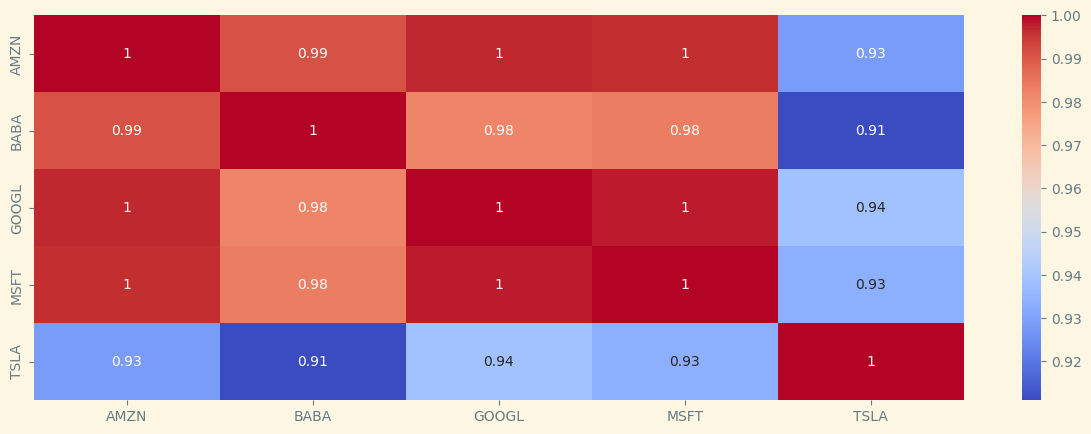

In [5]:
StockRelated.correlation_of_stock_price_reaction_to_price_change(GROWTH_STOCKS, days_to_look_back=1000)

Let's look at one stock closer.

In [6]:
df = CSVs.load_daily('MSFT')
df.head(2)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
Date,,,,,,,,
1999-11-01,93.25,94.19,92.12,92.37,28.750198,26630600,0.0,1.0
1999-11-02,92.75,94.50,91.94,92.56,28.809335,23174500,0.0,1.0


Check if data is actually adjusted for splits and dividends as it should be per the API documentation:

In [7]:
df['8. split coefficient'].value_counts()

8. split coefficient
1.0    5994
2.0       1
Name: count, dtype: int64

In [8]:
splits = df[~df['8. split coefficient'].isin([1])].copy(deep=True)
splits['8. split coefficient'] = splits['8. split coefficient'].astype('int')
splits

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
Date,,,,,,,,
2003-02-18,24.62,24.99,24.4,24.96,15.537619,28707750,0.0,2


Quick check online confirms that these are the dates of the splits for stock.  
Let's see if the next day's open price is adjusted for the split.

In [9]:
df.loc['2003-02-13':'2003-02-19']

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
Date,,,,,,,,
2003-02-13,46.41,47.12,46.13,46.99,14.625655,36779100,0.00,1.0
2003-02-14,47.25,48.50,46.77,48.30,15.033393,45223200,0.00,1.0
2003-02-18,24.62,24.99,24.40,24.96,15.537619,28707750,0.00,2.0
2003-02-19,24.82,24.88,24.17,24.53,15.319744,46902700,0.08,1.0


As we can see split was calculated correctly.

#### Probabilities for stock to go up or down based on previous day percentage change.

In [10]:
proba_df = StockRelated.calc_proba_price_change_based(df, percentChange=-4, days_back=730, print_proba=True)
proba_df

Probability of Negative move next day is 22.22%
Probability of Positive move next day is 77.78%


previous_day_return_bucket,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0
UP or DOWN,,,,,,,,,,,
-1,0.002743,0.002743,0.009602,0.008230,0.041152,0.098765,0.037037,0.017833,0.005487,0.004115,NaN
1,0.001372,0.009602,0.013717,0.061728,0.076818,0.393690,0.116598,0.064472,0.020576,0.006859,0.006859


In [11]:
df = StockRelated.assign_return_bucket(df)
df.head(4)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Daily Return,return bucket,UP or DOWN
Date,,,,,,,,,,,
1999-11-02,92.75,94.50,91.94,92.56,28.809335,23174500,0.0,1.0,0.002057,0,1
1999-11-03,92.94,93.50,91.50,92.00,28.635035,22258500,0.0,1.0,-0.006050,0,1
1999-11-04,92.31,92.75,90.31,91.75,28.557223,27119700,0.0,1.0,-0.002717,0,1
1999-11-05,91.81,92.87,90.50,91.56,28.498085,35083700,0.0,1.0,-0.002071,0,1


In [17]:
StockRelated.proba_up_down_geometric(df, cont_days=2, days_back=1000, direction='up')

Probability of MSFT going "UP" for 2 days in a row is 17.871%. Based on 1000 days of data.
